# RVM classification example

RVM prediction error on test set is 0


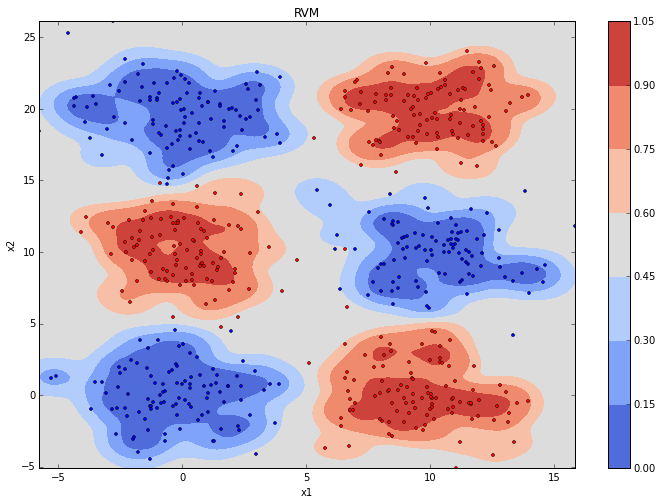

In [6]:
import os
os.chdir("/Users/amazaspshaumyan/Desktop/Bayesian Regression Methods/Relevance Vector Machine & ARD")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from rvm import SparseBayesianLearner
from sklearn.grid_search import GridSearchCV
%matplotlib inline
    
# generate data set
np.random.seed(0)
X   = np.ones([600,2])
x   = np.ones([600,2])
Y   = np.zeros(600)
y   = np.zeros(600)
centroids = [[0,0],[0,20],[10,10],[10,0],[0,10],[10,20]]
m         = 100
for i,mu in enumerate(centroids):
    sample   = 2*np.random.randn(2*m,2) + np.array(mu)
    X[i*m:(i+1)*m,:],x[i*m:(i+1)*m,:]=train_test_split(sample,test_size=0.5)
Y[300:600] = 1
y[300:600]  = 1


# train rvm with fixed-point optimization
rvm = SparseBayesianLearner(learn_type = "classification", 
                            method     = "fixed-point",
                            alpha_max  = 10,
                            kernel     = "gaussian",
                            scaler     = 1)
rvm.fit(X,Y)

# errors on test set & sparsity
rvm_error = np.sum(y!=rvm.predict(x)) / 600
rvm_message = "RVM prediction error on test set is {0}"
print rvm_message.format(rvm_error)
   
# decision boundary & prediction probability
# create grid
n_grid = 500
max_x      = np.max(X,axis = 0)
min_x      = np.min(X,axis = 0)
X1         = np.linspace(min_x[0],max_x[0],n_grid)
X2         = np.linspace(min_x[1],max_x[1],n_grid)
x1,x2      = np.meshgrid(X1,X2)
Xgrid      = np.zeros([n_grid**2,2])
Xgrid[:,0] = np.reshape(x1,(n_grid**2,))
Xgrid[:,1] = np.reshape(x2,(n_grid**2,))

rv_grid = rvm.predictive_distribution(Xgrid)

plt.figure(figsize=(12,8))
plt.contourf(X1,X2,np.reshape(rv_grid,(n_grid,n_grid)),
                   cmap="coolwarm")
plt.colorbar()
plt.plot(X[Y==0,0],X[Y==0,1],"bo", markersize = 3)
plt.plot(X[Y==1,0],X[Y==1,1],"ro", markersize = 3)
plt.plot()
title = "RVM"
plt.title(title)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
